In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [3]:
x, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_redundant = 0,
    n_classes = 2,
    n_clusters_per_class = 1,
    random_state = 1024
)

In [4]:
x.shape, y.shape

((200, 2), (200,))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=233)

In [6]:
x_train.shape

(140, 2)

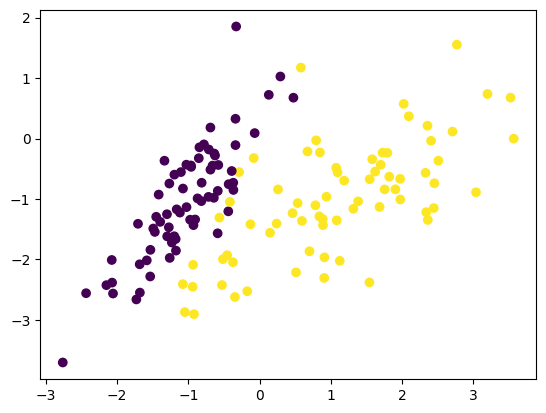

In [7]:
plt.scatter(x_train[:,0], x_train[:,1], c = y_train)

sklearn中的逻辑回归

In [8]:
from sklearn.linear_model import LogisticRegression

In [9]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [10]:
clf.score(x_train,y_train)

0.95

In [11]:
clf.score(x_test,y_test)

0.9166666666666666

In [12]:
clf.predict_proba(x_test)[:5]

array([[0.9854142 , 0.0145858 ],
       [0.00272796, 0.99727204],
       [0.98034529, 0.01965471],
       [0.88541889, 0.11458111],
       [0.9827135 , 0.0172865 ]])

In [13]:
np.argmax(clf.predict_proba(x_test),axis=1)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

## 超参数

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
params = [
    {
        'penalty': ['l2', 'l1'],    #惩罚l1是拉普拉斯分布，l2是正态分布，elasticnet是弹性网络
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],    #C越小正则化效率越高
        'solver': ['liblinear']    #小数据集推荐
    },
    {
        'penalty': ['none'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'solver': ['lbfgs']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
        'solver': ['saga'],
        'max_iter': [200]    #大数据集推荐
    }
]

In [17]:
grid = GridSearchCV(
    estimator = LogisticRegression(),
    param_grid = params,
    n_jobs = 1
)

In [18]:
grid.fit(x_train,y_train)

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not c

GridSearchCV(estimator=LogisticRegression(), n_jobs=1,
             param_grid=[{'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['l2', 'l1'], 'solver': ['liblinear']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'penalty': ['none'], 'solver': ['lbfgs']},
                         {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
                          'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                          'max_iter': [200], 'penalty': ['elasticnet'],
                          'solver': ['saga']}])

In [19]:
grid.best_score_

0.95

In [20]:
grid.best_estimator_.score(x_test,y_test)

0.9166666666666666

In [21]:
grid.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}